<a href="https://colab.research.google.com/github/Shashidhargk/VoicemorfingDetection/blob/main/voicemorfingdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


Found 64 files belonging to 2 classes.
Using 52 files for training.
Found 64 files belonging to 2 classes.
Using 12 files for validation.
Class names: ['fake', 'real']


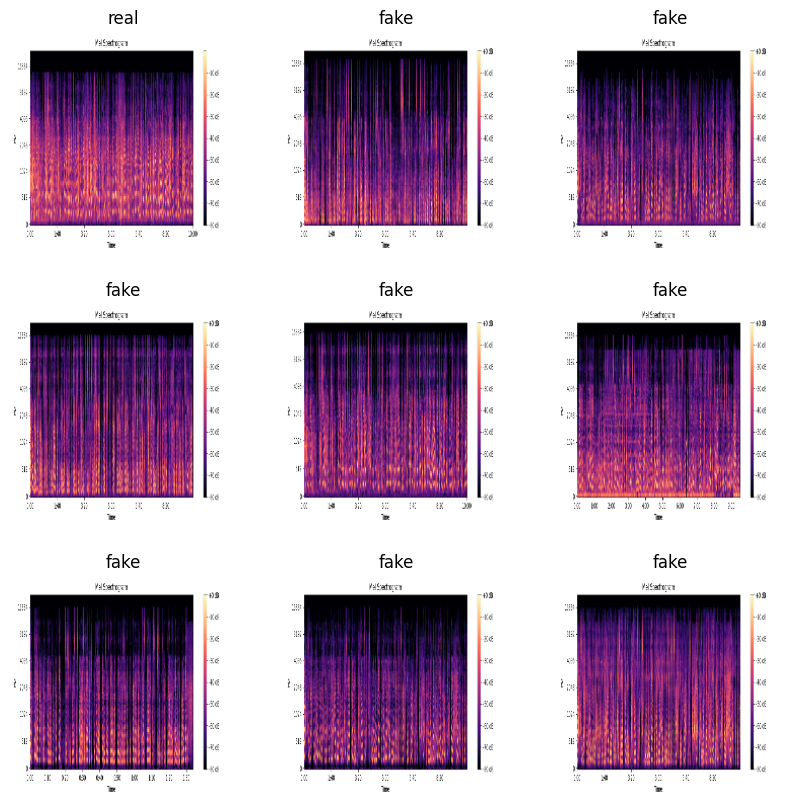

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Set parameters
img_height, img_width = 224, 224
batch_size = 32
data_dir = '/content/spectograms'  # Ensure this path is correct

# Load training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names
class_names = train_ds.class_names
print("Class names:", class_names)

# Plot sample images from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define a custom CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer for binary classification (Real vs Fake)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Prepare data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/spectograms',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    '/content/spectograms',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)
# Save the trained model
model.save('my_model.hdf5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 52 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7000 - loss: 0.5557 - val_accuracy: 0.9167 - val_loss: -0.3586
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9375 - loss: -0.2366 - val_accuracy: 0.9167 - val_loss: -0.6310
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8125 - loss: -1.3641 - val_accuracy: 0.9167 - val_loss: -0.9205
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9500 - loss: -0.5516 - val_accuracy: 0.9167 - val_loss: -1.2112
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8000 - loss: -2.8650 - val_accuracy: 0.9167 - val_loss: -1.5482
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9062 - loss: -1.7728 - val_accuracy: 0.9167 - val_loss: -1.9175
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8438 - loss: -3.6188 - val_accuracy: 0.9167 - val_loss: -2.3400
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9000 - loss: -2.7472 - val_accuracy: 0.9167 - val_loss: -2.8045
E

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:

# Set the number of epochs
epochs = 10

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.3470 - loss: 7222.4097 - val_accuracy: 0.9167 - val_loss: 7.1121
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7684 - loss: 15.2078 - val_accuracy: 0.9167 - val_loss: 4.8777
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7580 - loss: 7.6895 - val_accuracy: 0.9167 - val_loss: 7.0345
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8582 - loss: 10.8341 - val_accuracy: 0.9167 - val_loss: 2.8622
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7452 - loss: 4.6315 - val_accuracy: 0.9167 - val_loss: 0.9596
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.8894 - loss: 1.6809 - val_accuracy: 0.9167 - val_loss: 0.3891
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.8790 - loss: 0.4948 - val_accuracy: 0.9167 - val_loss: 0.3303
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.8814 - loss: 0.4384 - val_accuracy: 0.9167 - val_loss: 0.4859
Epoch

In [ ]:
model.save('my_model.hdf5')


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Load the trained model
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model('my_model.hdf5')
    return model

model = load_model()

# Function to convert audio file to mel spectrogram
def audio_to_mel_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Save the spectrogram as an image
    plt.figure(figsize=(7, 7))  # Adjusted size to better match the model input size
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.axis('off')

    # Convert to image
    img_buf = BytesIO()
    plt.savefig(img_buf, format='png', bbox_inches='tight', pad_inches=0)
    img_buf.seek(0)
    img = Image.open(img_buf).convert("RGB")  # Convert to RGB
    img = img.resize((224, 224))  # Resize to match model input size
    return np.array(img)

# Streamlit app
st.write("# Voice Morphing Detection")

uploaded_file = st.file_uploader("Please upload a WAV file", type=["wav"])

if uploaded_file is not None:
    # Save the uploaded file
    audio_path = "temp_audio.wav"
    with open(audio_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    st.audio(audio_path, format='audio/wav')

    # Convert audio to spectrogram
    spectrogram_image = audio_to_mel_spectrogram(audio_path)

    # Display the spectrogram
    st.image(spectrogram_image, caption="Mel Spectrogram", use_column_width=True)

    # Prepare the image for the model
    img_array = np.expand_dims(spectrogram_image, axis=0) / 255.0

    # Predict with the model
    prediction = model.predict(img_array)
    score = tf.nn.sigmoid(prediction[0]).numpy()  # Ensure score is a NumPy array

    # Extract the scalar value for formatting
    score_value = float(score)

    # Display debugging information
    st.write(f"Raw prediction: {prediction}")
    st.write(f"Prediction after sigmoid: {score_value}")

    if score_value > 0.4:
        st.write(f"The audio is **Morphed** with a confidence of {score_value:.2f}.")
    else:
        st.write(f"The audio is **Not Morphed** with a confidence of {1 - score_value:.2f}.")


Overwriting app.py


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 2qKWEP4xzHuzixGMqx6k1GniVVy_537ZyEff9318u7sbAK5G

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok

# List all existing ngrok tunnels
ngrok.kill() # Kill all existing tunnels

# Define the tunnel configuration
tunnel_config = {
    "addr": 8501,
    "proto": "http"  # Explicitly use HTTP
}

# Connect with the configuration
url = ngrok.connect(**tunnel_config)
url

<NgrokTunnel: "https://c86c-35-229-75-221.ngrok-free.app" -> "http://localhost:8501">